# NLP for writers

## 1. Data mining  

In [19]:
# import modules 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
# Pulling data from the web 
import requests 
from bs4 import BeautifulSoup
import pickle
# Text pre-processing technics 
import re
# creating a DTM
from sklearn.feature_extraction.text import CountVectorizer  
from textblob import TextBlob 
from collections import Counter

In [2]:
# getting the data 
urls = ['https://scrapsfromtheloft.com/2020/07/28/little-red-riding-hood-perrault-censorship/',
       'https://scrapsfromtheloft.com/2020/07/28/censorship-in-literature-fahrenheit-451/',
       'https://scrapsfromtheloft.com/2020/07/10/the-good-shepherd-c-s-forester-review/',
       'https://scrapsfromtheloft.com/2020/06/13/eight-oclock-in-the-morning-ray-nelson/',
       'https://scrapsfromtheloft.com/2020/06/27/book-review-thomas-ligotti-the-conspiracy-against-the-human-race-a-contrivance-of-horror/',
       'https://scrapsfromtheloft.com/2020/06/11/stanley-ellin-the-specialty-of-the-house/',
       'https://scrapsfromtheloft.com/2020/06/11/stanley-ellin-the-specialty-of-the-house/',
       'https://scrapsfromtheloft.com/2020/05/28/censorship-in-literature-of-mice-and-men/',
       'https://scrapsfromtheloft.com/2020/05/21/expendable-philip-k-dick/',
       'https://scrapsfromtheloft.com/2020/04/19/dostoevsky-brothers-karamazov-alberto-camus/',
       'https://scrapsfromtheloft.com/2020/04/10/john-updike-at-war-with-my-skin/',
       'https://scrapsfromtheloft.com/2020/04/20/birdman-of-alcatraz-story/']

writers = ['Charles Perrault', 'Ray Bradbury', 'Burke Wilkinson', 'Ray Nelson',
           'Thomas Ligotti', 'Stanley Ellin', 'Stephen H. Goldman', 'John Steinbeck',
           'Philip K. Dick', 'Albert Camus', 'John Updike', 'Thomas E. Gaddis'                                      
          ]

# let's creat a function to pull the text out from he websites 

def text(url):
    '''Pull the data text from the gien urls'''
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    text = [data.text for data in soup.find(class_='post-content').find_all('p')]
    print(url)
    return text

In [3]:
# Run our function on the urls 
texts = [text(url) for url in urls]

https://scrapsfromtheloft.com/2020/07/28/little-red-riding-hood-perrault-censorship/
https://scrapsfromtheloft.com/2020/07/28/censorship-in-literature-fahrenheit-451/
https://scrapsfromtheloft.com/2020/07/10/the-good-shepherd-c-s-forester-review/
https://scrapsfromtheloft.com/2020/06/13/eight-oclock-in-the-morning-ray-nelson/
https://scrapsfromtheloft.com/2020/06/27/book-review-thomas-ligotti-the-conspiracy-against-the-human-race-a-contrivance-of-horror/
https://scrapsfromtheloft.com/2020/06/11/stanley-ellin-the-specialty-of-the-house/
https://scrapsfromtheloft.com/2020/06/11/stanley-ellin-the-specialty-of-the-house/
https://scrapsfromtheloft.com/2020/05/28/censorship-in-literature-of-mice-and-men/
https://scrapsfromtheloft.com/2020/05/21/expendable-philip-k-dick/
https://scrapsfromtheloft.com/2020/04/19/dostoevsky-brothers-karamazov-alberto-camus/
https://scrapsfromtheloft.com/2020/04/10/john-updike-at-war-with-my-skin/
https://scrapsfromtheloft.com/2020/04/20/birdman-of-alcatraz-stor

In [4]:
# pickle the files for each writer 

for index, writer in enumerate(writers):
    with open('texts/'+ writer + '.txt', 'wb') as file:
        pickle.dump(texts[index], file)

In [5]:
# read the data into a dict 

data = {}

for index, writer in enumerate(writers):
    with open('texts/' + writer + '.txt', 'rb') as file: 
        data[writer] = pickle.load(file)
        
data.keys()        

dict_keys(['Charles Perrault', 'Ray Bradbury', 'Burke Wilkinson', 'Ray Nelson', 'Thomas Ligotti', 'Stanley Ellin', 'Stephen H. Goldman', 'John Steinbeck', 'Philip K. Dick', 'Albert Camus', 'John Updike', 'Thomas E. Gaddis'])

In [6]:
# combining all the chunks into one single text 

def combine(text):
    '''Combine all the chunks into one single big text'''
    text = ' '.join([i for i in text])
    return text
       
data =   {key : [combine(value)] for (key, value) in data.items()}

 # check our text
data['Albert Camus']

['Ivan Karamazov and the Rebellion against God by Albert Camus If the romantic rebel extols evil and the individual, this does not mean that he sides with mankind, but merely with himself. Dandyism, of whatever kind, is always dandyism in relation to God. The individual, in so far as he is a created being, can oppose himself only to the Creator. He has need of God, with whom he carries on a kind of a gloomy flirtation. Armand Hoog1 rightly says that, despite its Nietzschean atmosphere, God is not yet dead even in romantic literature. Damnation, so clamorously demanded, is only a clever trick played on God. But with Dostoevsky the description of rebellion goes a step farther. Ivan Karamazov sides with mankind and stresses human innocence. He affirms that the death sentence which hangs over them is unjust. Far from making a plea for evil, his first impulse, at least, is to plead for justice, which he ranks above the divinity. Thus he does not absolutely deny the existence of God. He refu

In [7]:
# creat a coprus 

corpus = pd.DataFrame.from_dict(data).transpose()
corpus.columns = ['text']
corpus.sort_index(inplace = True)
corpus

,text
Albert Camus,Ivan Karamazov and the Rebellion against God b...
Burke Wilkinson,by Burke Wilkinson C. S. Forester has two skil...
Charles Perrault,Author: Charles Perrault\nOriginal dates and p...
John Steinbeck,OF MICE AND MEN Author: John Steinbeck\nOrigin...
John Updike,PERSONAL HISTORY telling how the writer has li...
Philip K. Dick,by Philip K. Dick Here’s a wry little story—bu...
Ray Bradbury,FAHRENHEIT 451\nAuthor: Ray Bradbury\nOriginal...
Ray Nelson,"Here’s one of the classic SF paranoia stories,..."
Stanley Ellin,"by Stanley Ellin “And this,” said Laffler, “is..."
Stephen H. Goldman,"by Stanley Ellin “And this,” said Laffler, “is..."


In [8]:
corpus.text.iloc[0]

'Ivan Karamazov and the Rebellion against God by Albert Camus If the romantic rebel extols evil and the individual, this does not mean that he sides with mankind, but merely with himself. Dandyism, of whatever kind, is always dandyism in relation to God. The individual, in so far as he is a created being, can oppose himself only to the Creator. He has need of God, with whom he carries on a kind of a gloomy flirtation. Armand Hoog1 rightly says that, despite its Nietzschean atmosphere, God is not yet dead even in romantic literature. Damnation, so clamorously demanded, is only a clever trick played on God. But with Dostoevsky the description of rebellion goes a step farther. Ivan Karamazov sides with mankind and stresses human innocence. He affirms that the death sentence which hangs over them is unjust. Far from making a plea for evil, his first impulse, at least, is to plead for justice, which he ranks above the divinity. Thus he does not absolutely deny the existence of God. He refut

In [9]:
# Text pre-processing technics 

def clean(text):
    '''Clean the text from none relevant information like pounctuations ... etc'''
    text = text.lower()
    text = re.sub('\[*\]*', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[“”()*;‘]', '', text)  
    text = re.sub('[.,’:?!—-]', '', text)
    text = re.sub('\d+|©  |inc.', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('url\s+', '', text)
    text = re.sub(r'\w+//\w+/[\w/]+', '', text) 
    text = re.sub(r'available online', '', text)
    return text.strip(' ')

corpus = pd.DataFrame(corpus.text.apply(clean))
corpus
corpus.to_pickle('output/corpus.pkl')

In [10]:
corpus.text.iloc[4]

'personal history telling how the writer has lived with psoriasis a skin ailment it is a metabolic disorder that causes the epidermis which normally replaces itself in the course of several days to speed up the process and to produce excess skin cells a tendency to it is inherited the writers mother had it and her mother had it the disease favors the fair the dryskinned it keeps you thinking strategies of concealment ramify and selfexamination is endless because of his skin problem writer chose a profession that did not demand being presentable he married young because he found a comely & gracious female who forgave him his skin they moved to ipswich mass because the town had a great beach baking in the sun on the beach relieved the skin symptoms tells about their life in ipswich in august to escape local biting flies they left and rented a house in marthas vineyard in the winter he went to the caribbean for the sun tells about these visits in the fall of he left his wife and ipswich t

In [11]:
# creat a document-term matrix 

cv = CountVectorizer(stop_words = 'english', ngram_range = (1,1), analyzer = 'word')
data_cv = cv.fit_transform(corpus.text)
dtm = pd.DataFrame(data_cv.toarray(), columns= cv.get_feature_names())
dtm.index = corpus.index
dtm.to_pickle('output/dtm.pkl')
dtm

,abandoned,abide,ability,able,abnormal,abolished,abolition,abortion,abound,abruptly,...,youll,young,younger,youngish,youre,youth,youve,zapffehold,zipes,zosime
Albert Camus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Burke Wilkinson,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charles Perrault,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,2,0
John Steinbeck,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
John Updike,0,0,0,0,1,0,0,0,0,0,...,0,6,0,1,0,0,0,0,0,0
Philip K. Dick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Ray Bradbury,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Ray Nelson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Stanley Ellin,0,0,0,0,0,0,0,0,0,3,...,3,0,0,0,7,0,1,0,0,0
Stephen H. Goldman,0,0,0,0,0,0,0,0,0,3,...,3,0,0,0,7,0,1,0,0,0


## 2. Exploratory Data Analysis (EDA)

In this section we will be exploring:

* Top words for each writers (most common words).
* Vocabulary size for each writers (unique words).

In [12]:
eda = dtm.transpose()
eda

,Albert Camus,Burke Wilkinson,Charles Perrault,John Steinbeck,John Updike,Philip K. Dick,Ray Bradbury,Ray Nelson,Stanley Ellin,Stephen H. Goldman,Thomas E. Gaddis,Thomas Ligotti
abandoned,0,0,0,0,0,0,0,0,0,0,1,0
abide,0,0,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,1,1
able,0,2,0,1,0,0,0,0,0,0,1,0
abnormal,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
youth,0,0,0,1,0,0,0,0,0,0,1,0
youve,0,0,0,0,0,0,0,0,1,1,0,0
zapffehold,0,0,0,0,0,0,0,0,0,0,0,1
zipes,0,0,2,0,0,0,0,0,0,0,0,0


In [13]:
# Pulling top 50 words for each writer 

top_words = {}
for writer in eda.columns:
    top = eda[writer].sort_values(ascending = False).head(30)
    top_words[writer] = list(zip(top.index, top.values))
    
top_words

{'Albert Camus': [('ivan', 31),
  ('god', 27),
  ('rebellion', 15),
  ('evil', 11),
  ('does', 10),
  ('world', 10),
  ('death', 9),
  ('permitted', 9),
  ('suffering', 9),
  ('truth', 9),
  ('creation', 8),
  ('moment', 8),
  ('man', 8),
  ('life', 8),
  ('immortality', 7),
  ('faith', 7),
  ('father', 7),
  ('fact', 7),
  ('grand', 6),
  ('rejects', 6),
  ('says', 6),
  ('crime', 6),
  ('killed', 6),
  ('live', 6),
  ('mankind', 5),
  ('virtue', 5),
  ('far', 5),
  ('rebels', 5),
  ('dostoevsky', 5),
  ('inquisitors', 5)],
 'Burke Wilkinson': [('krause', 8),
  ('good', 7),
  ('shepherd', 6),
  ('man', 4),
  ('sense', 4),
  ('story', 4),
  ('action', 3),
  ('fear', 3),
  ('forester', 3),
  ('participation', 3),
  ('like', 3),
  ('novel', 3),
  ('time', 3),
  ('identification', 3),
  ('burke', 2),
  ('ends', 2),
  ('new', 2),
  ('foresters', 2),
  ('wilkinson', 2),
  ('war', 2),
  ('come', 2),
  ('command', 2),
  ('ships', 2),
  ('men', 2),
  ('master', 2),
  ('make', 2),
  ('writing',

In [30]:
Counter(top_words).most_common()

[('Thomas E. Gaddis',
  [('stroud', 85),
   ('prison', 28),
   ('strouds', 23),
   ('bird', 22),
   ('cell', 17),
   ('birds', 17),
   ('day', 12),
   ('began', 12),
   ('leavenworth', 11),
   ('later', 11),
   ('took', 11),
   ('life', 11),
   ('said', 10),
   ('wrote', 10),
   ('mother', 10),
   ('prisoners', 9),
   ('years', 9),
   ('permitted', 9),
   ('prisoner', 9),
   ('federal', 9),
   ('man', 9),
   ('robert', 9),
   ('time', 9),
   ('guard', 9),
   ('canaries', 8),
   ('convicts', 8),
   ('warden', 8),
   ('got', 8),
   ('books', 8),
   ('kitty', 8)]),
 ('John Updike',
  [('skin', 23),
   ('psoriasis', 19),
   ('did', 13),
   ('sun', 10),
   ('mother', 8),
   ('like', 7),
   ('naked', 6),
   ('young', 6),
   ('good', 5),
   ('time', 5),
   ('face', 5),
   ('came', 5),
   ('went', 5),
   ('summer', 5),
   ('looked', 4),
   ('spots', 4),
   ('disease', 4),
   ('cure', 4),
   ('new', 4),
   ('nature', 4),
   ('class', 4),
   ('house', 4),
   ('ipswich', 4),
   ('remember', 4),
 

In [32]:
# Let's first pull out the top 30 words for each comedian
words = []
for writer in eda.columns:
    top = [word for (word, count) in top_words[writer]]
    for t in top:
        words.append(t)
        
words

['ivan',
 'god',
 'rebellion',
 'evil',
 'does',
 'world',
 'death',
 'permitted',
 'suffering',
 'truth',
 'creation',
 'moment',
 'man',
 'life',
 'immortality',
 'faith',
 'father',
 'fact',
 'grand',
 'rejects',
 'says',
 'crime',
 'killed',
 'live',
 'mankind',
 'virtue',
 'far',
 'rebels',
 'dostoevsky',
 'inquisitors',
 'krause',
 'good',
 'shepherd',
 'man',
 'sense',
 'story',
 'action',
 'fear',
 'forester',
 'participation',
 'like',
 'novel',
 'time',
 'identification',
 'burke',
 'ends',
 'new',
 'foresters',
 'wilkinson',
 'war',
 'come',
 'command',
 'ships',
 'men',
 'master',
 'make',
 'writing',
 'voices',
 'dimension',
 'krauses',
 'little',
 'wolf',
 'red',
 'grandmother',
 'ridinghood',
 'girl',
 'hood',
 'tales',
 'riding',
 'story',
 'got',
 'book',
 'wine',
 'grandmamma',
 'great',
 'young',
 'said',
 'better',
 'house',
 'books',
 'pot',
 'ill',
 'butter',
 'hunter',
 'fairy',
 'door',
 'states',
 'perraults',
 'district',
 'published',
 'school',
 'novel',
 'b

In [33]:
# printing 15 top words for each writer 

for writer, list in top_words.items():
    print(writer + ':')
    print(' ,'.join([word for word, number in list[:14]]))
    print('- -')
    print()

Albert Camus:
ivan ,god ,rebellion ,evil ,does ,world ,death ,permitted ,suffering ,truth ,creation ,moment ,man ,life
- -

Burke Wilkinson:
krause ,good ,shepherd ,man ,sense ,story ,action ,fear ,forester ,participation ,like ,novel ,time ,identification
- -

Charles Perrault:
little ,wolf ,red ,grandmother ,ridinghood ,girl ,hood ,tales ,riding ,story ,got ,book ,wine ,grandmamma
- -

John Steinbeck:
school ,novel ,book ,men ,profanity ,reading ,board ,high ,mice ,lennie ,parents ,parent ,language ,removed
- -

John Updike:
skin ,psoriasis ,did ,sun ,mother ,like ,naked ,young ,good ,time ,face ,came ,went ,summer
- -

Philip K. Dick:
man ,came ,said ,time ,spider ,know ,ants ,went ,inside ,desk ,bushes ,im ,ahead ,tirmus
- -

Ray Bradbury:
books ,expurgated ,book ,school ,version ,bradbury ,fahrenheit ,montag ,ala ,edition ,ballantine ,original ,novel ,fireman
- -

Ray Nelson:
george ,said ,went ,tv ,did ,wake ,door ,man ,eyes ,saw ,little ,just ,aliens ,friends
- -

Stanley Ellin:

In [34]:
# let's see the size of the vocabulary each writers uses 

size = []
for writer in eda.columns:
    number = eda[writer].to_numpy().nonzero()[0].size
    size.append(number)
    
size

[639, 230, 548, 557, 882, 632, 400, 516, 1664, 1664, 1219, 645]

In [35]:
vocab = pd.DataFrame(zip(writers, size), columns = ['writer', 'size'])
vocab.style.highlight_max(color = 'red')

,writer,size
0,Charles Perrault,639
1,Ray Bradbury,230
2,Burke Wilkinson,548
3,Ray Nelson,557
4,Thomas Ligotti,882
5,Stanley Ellin,632
6,Stephen H. Goldman,400
7,John Steinbeck,516
8,Philip K. Dick,1664
9,Albert Camus,1664


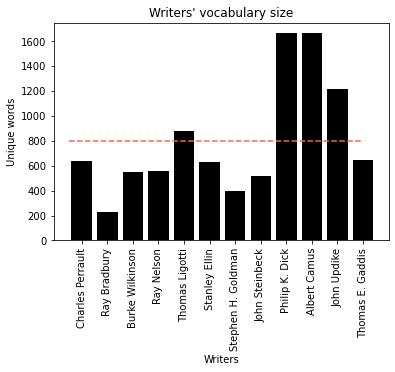

In [39]:
# plot vocabulary size per each writer 

plt.bar('writer', 'size', data = vocab, color = 'k')
plt.xticks(rotation = 'vertical')
plt.hlines(y = 799.66, xmin = -.5, xmax = 11, color = 'tomato', linestyles = '--')
plt.ylabel('Unique words')
plt.xlabel('Writers')
plt.title('Writers\' vocabulary size')
plt.show()

## 3. Sentiment analysis  

In [40]:
corpus

,text
Albert Camus,ivan karamazov and the rebellion against god b...
Burke Wilkinson,by burke wilkinson c s forester has two skills...
Charles Perrault,author charles perrault original dates and pla...
John Steinbeck,of mice and men author john steinbeck original...
John Updike,personal history telling how the writer has li...
Philip K. Dick,by philip k dick heres a wry little storybut o...
Ray Bradbury,fahrenheit author ray bradbury original date a...
Ray Nelson,heres one of the classic sf paranoia stories a...
Stanley Ellin,by stanley ellin and this said laffler is sbir...
Stephen H. Goldman,by stanley ellin and this said laffler is sbir...


In [41]:
# add sentiment analysis using TextBlomb 

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x : TextBlob(x).sentiment.subjectivity 

corpus['polarity'] = pd.DataFrame(corpus.text.apply(polarity))
corpus['subjectivity'] = pd.DataFrame(corpus.text.apply(subjectivity))
corpus

,text,polarity,subjectivity
Albert Camus,ivan karamazov and the rebellion against god b...,0.050840,0.583215
Burke Wilkinson,by burke wilkinson c s forester has two skills...,0.169594,0.491222
Charles Perrault,author charles perrault original dates and pla...,0.040251,0.458147
John Steinbeck,of mice and men author john steinbeck original...,0.029540,0.462260
John Updike,personal history telling how the writer has li...,0.097406,0.476491
Philip K. Dick,by philip k dick heres a wry little storybut o...,0.002900,0.498179
Ray Bradbury,fahrenheit author ray bradbury original date a...,0.084086,0.394680
Ray Nelson,heres one of the classic sf paranoia stories a...,0.024505,0.454370
Stanley Ellin,by stanley ellin and this said laffler is sbir...,0.080036,0.529057
Stephen H. Goldman,by stanley ellin and this said laffler is sbir...,0.080036,0.529057


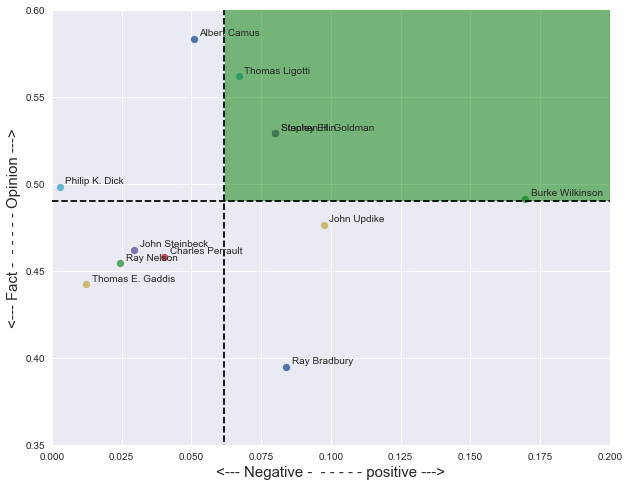

In [42]:
# Plot sentiment analysis for each writer 

plt.style.use('seaborn')

plt.rcParams['figure.figsize'] = [10,8]
for index, writer in enumerate(corpus.index):
    x = corpus.polarity[writer]
    y = corpus.subjectivity[writer]
    plt.scatter(x, y)
    plt.text(x = x+0.002, y = y+0.002, s= writer)
plt.xlabel('<--- Negative -  - - - - - positive --->', fontsize = 15)
plt.ylabel('<--- Fact -  - - - - - Opinion --->', fontsize = 15)
plt.vlines(x = np.mean(corpus.polarity), ymin = 0, ymax = 1, linestyles = '--')
plt.hlines(y = np.mean(corpus.subjectivity), xmin = 0, xmax = 1, linestyles = '--')
plt.axhspan(ymin = np.mean(corpus.subjectivity), ymax = 0.6, xmin = 0.311, xmax = 1, color = 'g', alpha =.5)
plt.ylim(.35,0.6)
plt.xlim(0,0.2)
plt.show()

From this plot we can notice that:
* fatcs are negative, life is not easy and it is not positive.
* Phillip K. Dick and Burke Willkinson are quite on the same wave of subjectivity but very opposit in polarity.


## 4. Topic modelling 

In [46]:
# import modules 

from gensim import matutils,models
import scipy.sparse 

In [47]:
eda

,Albert Camus,Burke Wilkinson,Charles Perrault,John Steinbeck,John Updike,Philip K. Dick,Ray Bradbury,Ray Nelson,Stanley Ellin,Stephen H. Goldman,Thomas E. Gaddis,Thomas Ligotti
abandoned,0,0,0,0,0,0,0,0,0,0,1,0
abide,0,0,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,1,1
able,0,2,0,1,0,0,0,0,0,0,1,0
abnormal,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
youth,0,0,0,1,0,0,0,0,0,0,1,0
youve,0,0,0,0,0,0,0,0,1,1,0,0
zapffehold,0,0,0,0,0,0,0,0,0,0,0,1
zipes,0,0,2,0,0,0,0,0,0,0,0,0


In [48]:
sparse_counts = scipy.sparse.csr_matrix(eda)
corpus_new = matutils.Sparse2Corpus(sparse_counts)

In [49]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [50]:
# here we are using 2 topics 
lda = models.LdaModel(corpus=corpus_new, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.007*"school" + 0.007*"george" + 0.004*"novel" + 0.004*"book" + 0.004*"ivan" + 0.004*"god" + 0.003*"did" + 0.003*"books" + 0.003*"skin" + 0.003*"men"'),
 (1,
  '0.013*"costain" + 0.013*"said" + 0.010*"laffler" + 0.006*"stroud" + 0.006*"man" + 0.005*"sbirro" + 0.004*"sbirros" + 0.003*"little" + 0.003*"time" + 0.003*"good"')]

In [53]:
# as you can see from the output is not really representative so let's try to increase our topic model number to 3
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus_new, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.010*"stroud" + 0.005*"man" + 0.004*"time" + 0.004*"books" + 0.004*"ivan" + 0.003*"god" + 0.003*"life" + 0.003*"prison" + 0.003*"said" + 0.003*"bird"'),
 (1,
  '0.013*"school" + 0.009*"little" + 0.008*"book" + 0.007*"novel" + 0.006*"wolf" + 0.006*"red" + 0.004*"reading" + 0.004*"men" + 0.004*"grandmother" + 0.004*"profanity"'),
 (2,
  '0.021*"costain" + 0.018*"said" + 0.016*"laffler" + 0.009*"sbirro" + 0.006*"man" + 0.006*"sbirros" + 0.005*"george" + 0.004*"waiter" + 0.004*"sair" + 0.004*"eyes"')]

In [54]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus_new, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.024*"costain" + 0.019*"said" + 0.018*"laffler" + 0.010*"sbirro" + 0.007*"sbirros" + 0.006*"man" + 0.005*"sair" + 0.005*"waiter" + 0.004*"table" + 0.004*"lamb"'),
 (1,
  '0.001*"costain" + 0.001*"said" + 0.000*"laffler" + 0.000*"man" + 0.000*"stroud" + 0.000*"sbirro" + 0.000*"ivan" + 0.000*"god" + 0.000*"life" + 0.000*"know"'),
 (2,
  '0.013*"stroud" + 0.007*"george" + 0.006*"said" + 0.006*"man" + 0.004*"prison" + 0.004*"did" + 0.004*"went" + 0.004*"time" + 0.004*"came" + 0.004*"bird"'),
 (3,
  '0.009*"school" + 0.007*"book" + 0.006*"little" + 0.006*"novel" + 0.005*"ivan" + 0.005*"books" + 0.004*"god" + 0.004*"wolf" + 0.003*"red" + 0.003*"men"')]

By far you can see that our output still not meaningful. In this next section we will be only focusing on 'Nouns'. 

In [55]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [56]:
corpus

,text,polarity,subjectivity
Albert Camus,ivan karamazov and the rebellion against god b...,0.050840,0.583215
Burke Wilkinson,by burke wilkinson c s forester has two skills...,0.169594,0.491222
Charles Perrault,author charles perrault original dates and pla...,0.040251,0.458147
John Steinbeck,of mice and men author john steinbeck original...,0.029540,0.462260
John Updike,personal history telling how the writer has li...,0.097406,0.476491
Philip K. Dick,by philip k dick heres a wry little storybut o...,0.002900,0.498179
Ray Bradbury,fahrenheit author ray bradbury original date a...,0.084086,0.394680
Ray Nelson,heres one of the classic sf paranoia stories a...,0.024505,0.454370
Stanley Ellin,by stanley ellin and this said laffler is sbir...,0.080036,0.529057
Stephen H. Goldman,by stanley ellin and this said laffler is sbir...,0.080036,0.529057


In [57]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(corpus.text.apply(nouns))
data_nouns

,text
Albert Camus,ivan karamazov rebellion god camus rebel extol...
Burke Wilkinson,burke wilkinson c s forester skills shepherd f...
Charles Perrault,author charles dates places publication paris ...
John Steinbeck,mice men john steinbeck date place publication...
John Updike,history writer psoriasis ailment disorder epid...
Philip K. Dick,philip k dick storybut sting tail enemies alli...
Ray Bradbury,fahrenheit author bradbury date place publicat...
Ray Nelson,heres sf paranoia tale aliens schemes day worl...
Stanley Ellin,ellin laffler costain brownstone others side d...
Stephen H. Goldman,ellin laffler costain brownstone others side d...


In [66]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = words # from the most common words for authors 
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words='english')
data_cvn = cvn.fit_transform(data_nouns.text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,ability,abolition,abortion,absence,absolute,abstinence,absurdity,abuse,abyss,acceptance,...,york,yorker,youll,younger,youre,youth,youve,zapffehold,zipes,zosime
Albert Camus,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
Burke Wilkinson,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Charles Perrault,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0
John Steinbeck,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
John Updike,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0
Philip K. Dick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Ray Bradbury,0,1,1,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,0,0
Ray Nelson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Stanley Ellin,0,0,0,1,0,1,0,0,0,0,...,0,0,2,0,5,0,1,0,0,0
Stephen H. Goldman,0,0,0,1,0,1,0,0,0,0,...,0,0,2,0,5,0,1,0,0,0


In [62]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [67]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.003*"head" + 0.003*"food" + 0.003*"youre" + 0.003*"room" + 0.003*"matter" + 0.003*"voice" + 0.003*"feet" + 0.003*"chair" + 0.003*"business" + 0.002*"hair"'),
 (1,
  '0.004*"students" + 0.003*"reason" + 0.003*"history" + 0.003*"freedom" + 0.003*"child" + 0.003*"year" + 0.003*"question" + 0.003*"children" + 0.003*"officials" + 0.003*"job"')]

In [70]:
# Let's start with 3 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.004*"question" + 0.003*"history" + 0.003*"place" + 0.003*"reason" + 0.003*"end" + 0.003*"body" + 0.003*"night" + 0.003*"heart" + 0.003*"mystery" + 0.003*"freedom"'),
 (1,
  '0.005*"food" + 0.004*"head" + 0.004*"matter" + 0.004*"voice" + 0.004*"room" + 0.004*"times" + 0.004*"costains" + 0.004*"meat" + 0.004*"invitation" + 0.004*"chair"'),
 (2,
  '0.005*"year" + 0.003*"journal" + 0.003*"city" + 0.003*"officials" + 0.003*"child" + 0.003*"students" + 0.003*"wife" + 0.003*"job" + 0.003*"letters" + 0.003*"block"')]

In [72]:
# Let's start with 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.005*"freedom" + 0.003*"reason" + 0.003*"question" + 0.003*"history" + 0.003*"justice" + 0.003*"kind" + 0.003*"ones" + 0.003*"knowledge" + 0.003*"form" + 0.003*"end"'),
 (1,
  '0.004*"year" + 0.003*"block" + 0.003*"city" + 0.003*"night" + 0.003*"youre" + 0.003*"body" + 0.003*"hours" + 0.003*"gun" + 0.003*"letters" + 0.003*"court"'),
 (2,
  '0.005*"food" + 0.005*"head" + 0.004*"matter" + 0.004*"room" + 0.004*"surprise" + 0.004*"chair" + 0.004*"costains" + 0.004*"meat" + 0.004*"restaurant" + 0.004*"ah"'),
 (3,
  '0.005*"job" + 0.005*"tennessee" + 0.004*"year" + 0.004*"reason" + 0.004*"officials" + 0.004*"students" + 0.004*"review" + 0.004*"curriculum" + 0.004*"slurs" + 0.004*"coalition"')]

By far you can see that our output still not meaningful. In this next section we will be only focusing on 'Nouns and Adjectives'.

In [74]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [76]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(corpus.text.apply(nouns_adj))
data_nouns_adj

,text
Albert Camus,ivan karamazov rebellion god albert camus roma...
Burke Wilkinson,burke wilkinson c s forester skills good sheph...
Charles Perrault,author charles original dates places publicati...
John Steinbeck,mice men john steinbeck original date place pu...
John Updike,personal history writer psoriasis skin ailment...
Philip K. Dick,philip k dick wry little storybut sting tail w...
Ray Bradbury,fahrenheit author ray bradbury original date p...
Ray Nelson,heres classic sf paranoia tale aliens nefariou...
Stanley Ellin,stanley ellin laffler sbirros costain square b...
Stephen H. Goldman,stanley ellin laffler sbirros costain square b...


In [79]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words= 'english', max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,ability,able,abnormal,abolition,abortion,absence,absolute,abstinence,absurd,absurdity,...,youll,young,younger,youngish,youre,youth,youve,zapffehold,zipes,zosime
Albert Camus,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Burke Wilkinson,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charles Perrault,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,1,0
John Steinbeck,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
John Updike,0,0,1,0,0,0,0,0,0,0,...,0,6,0,1,0,0,0,0,0,0
Philip K. Dick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Ray Bradbury,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Ray Nelson,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Stanley Ellin,0,0,0,0,0,1,1,1,0,0,...,3,0,0,0,5,0,1,0,0,0
Stephen H. Goldman,0,0,0,0,0,1,1,1,0,0,...,3,0,0,0,5,0,1,0,0,0


In [81]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [83]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.017*"costain" + 0.013*"laffler" + 0.007*"school" + 0.006*"sbirro" + 0.005*"little" + 0.005*"sbirros" + 0.005*"book" + 0.005*"waiter" + 0.004*"novel" + 0.004*"sair"'),
 (1,
  '0.013*"stroud" + 0.007*"george" + 0.006*"ivan" + 0.005*"prison" + 0.004*"life" + 0.004*"bird" + 0.004*"skin" + 0.004*"god" + 0.004*"strouds" + 0.003*"mother"')]

In [86]:
# Let's start with 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.019*"stroud" + 0.010*"george" + 0.008*"prison" + 0.006*"bird" + 0.005*"strouds" + 0.005*"day" + 0.005*"birds" + 0.005*"cell" + 0.003*"eyes" + 0.003*"life"'),
 (1,
  '0.008*"ivan" + 0.006*"books" + 0.006*"god" + 0.006*"skin" + 0.005*"psoriasis" + 0.004*"life" + 0.004*"rebellion" + 0.003*"new" + 0.003*"death" + 0.003*"truth"'),
 (2,
  '0.022*"costain" + 0.017*"laffler" + 0.008*"sbirro" + 0.008*"school" + 0.007*"little" + 0.007*"sbirros" + 0.006*"waiter" + 0.005*"book" + 0.005*"sair" + 0.005*"table"')]

In [87]:
# Let's start with 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.016*"little" + 0.014*"books" + 0.011*"wolf" + 0.010*"red" + 0.008*"book" + 0.007*"grandmother" + 0.006*"school" + 0.006*"version" + 0.005*"ridinghood" + 0.005*"girl"'),
 (1,
  '0.020*"george" + 0.020*"school" + 0.012*"novel" + 0.010*"book" + 0.007*"men" + 0.007*"profanity" + 0.006*"high" + 0.006*"board" + 0.005*"language" + 0.005*"mice"'),
 (2,
  '0.023*"costain" + 0.018*"laffler" + 0.009*"sbirro" + 0.007*"sbirros" + 0.006*"waiter" + 0.005*"table" + 0.005*"sair" + 0.005*"lamb" + 0.005*"kitchen" + 0.005*"ivan"'),
 (3,
  '0.019*"stroud" + 0.008*"prison" + 0.006*"bird" + 0.006*"skin" + 0.005*"strouds" + 0.005*"mother" + 0.005*"psoriasis" + 0.005*"day" + 0.005*"cell" + 0.005*"birds"')]

Now, let's identify topics in each document 

In [89]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.013*"little" + 0.013*"george" + 0.010*"ivan" + 0.008*"wolf" + 0.007*"red" + 0.007*"god" + 0.005*"rebellion" + 0.005*"grandmother" + 0.004*"door" + 0.004*"moment"'),
 (1,
  '0.031*"costain" + 0.023*"laffler" + 0.012*"sbirro" + 0.009*"sbirros" + 0.008*"waiter" + 0.007*"table" + 0.007*"sair" + 0.006*"lamb" + 0.006*"kitchen" + 0.005*"face"'),
 (2,
  '0.017*"books" + 0.006*"book" + 0.006*"school" + 0.006*"version" + 0.005*"montag" + 0.005*"bradbury" + 0.005*"fahrenheit" + 0.004*"novel" + 0.004*"original" + 0.004*"expurgated"'),
 (3,
  '0.014*"stroud" + 0.010*"school" + 0.006*"prison" + 0.006*"novel" + 0.006*"book" + 0.005*"bird" + 0.005*"skin" + 0.004*"birds" + 0.004*"men" + 0.004*"day"')]

These four topics look pretty decent. Let's settle on these for now.

* **Topic 0**: Relegion, rebellion and familly. 
* **Topic 1**: Food services. 
* **Topic 2**: Education. 
* **Topic 3**: Education, suffer. 

In [114]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
print(*zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

(0, 'Albert Camus') (0, 'Burke Wilkinson') (0, 'Charles Perrault') (3, 'John Steinbeck') (3, 'John Updike') (3, 'Philip K. Dick') (2, 'Ray Bradbury') (0, 'Ray Nelson') (1, 'Stanley Ellin') (1, 'Stephen H. Goldman') (3, 'Thomas E. Gaddis') (3, 'Thomas Ligotti')


So, this is the end of our analysis.